In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
from scipy import stats
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [5]:
# importing csv
customers_df = pd.read_csv('twm_customer.csv', delimiter=';')
customers_df.head()

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code
0,1362691,26150,46,5,1,M,2,,Donald ...,Marek ...,8298,Second ...,89194,Las Vegas,NV
1,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,10603,Daffodil ...,90159,Los Angeles,CA
2,1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,8817,Figueroa ...,90024,Los Angeles,CA
3,1362752,47668,54,3,0,F,1,,Lisa ...,Martin ...,676,Humble ...,90172,Los Angeles,CA
4,1362548,44554,59,9,2,F,4,,Barbara ...,O'Malley ...,6578,C ...,10138,New York City,NY


In [3]:
# changing marital status to a category
customers_df['marital_status'] = customers_df['marital_status'].astype('category')

In [4]:
customers_df.describe()

,cust_id,income,age,years_with_bank,nbr_children,street_nbr,postal_code
count,7.470000e+02,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000
mean,1.362991e+06,22728.281124,42.479250,3.907631,0.714859,8523.109772,59502.690763
std,2.925255e+02,22207.221405,19.114879,2.675634,1.103410,5219.488263,31205.926508
min,1.362480e+06,0.000000,13.000000,0.000000,0.000000,196.000000,2149.000000
25%,1.362732e+06,7118.500000,28.000000,2.000000,0.000000,4295.500000,33145.000000
50%,1.362993e+06,17242.000000,42.000000,4.000000,0.000000,8001.000000,64132.000000
75%,1.363244e+06,31338.000000,56.000000,6.000000,1.000000,12039.000000,90082.000000
max,1.363495e+06,144157.000000,89.000000,9.000000,5.000000,19940.000000,98186.000000


In [5]:
customers_df.corr()

,cust_id,income,age,years_with_bank,nbr_children,street_nbr,postal_code
cust_id,1.000000,-0.015280,-0.047987,-0.004047,-0.008359,-0.144411,-0.000395
income,-0.015280,1.000000,0.244919,0.040604,0.283352,0.025865,-0.031459
age,-0.047987,0.244919,1.000000,0.181478,-0.057195,-0.024608,-0.075745
years_with_bank,-0.004047,0.040604,0.181478,1.000000,-0.034814,0.019084,0.035959
nbr_children,-0.008359,0.283352,-0.057195,-0.034814,1.000000,0.025480,0.081031
street_nbr,-0.144411,0.025865,-0.024608,0.019084,0.025480,1.000000,-0.046444
postal_code,-0.000395,-0.031459,-0.075745,0.035959,0.081031,-0.046444,1.000000


In [9]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747 entries, 0 to 746
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   cust_id          747 non-null    int64   
 1   income           747 non-null    int64   
 2   age              747 non-null    int64   
 3   years_with_bank  747 non-null    int64   
 4   nbr_children     747 non-null    int64   
 5   gender           747 non-null    int64   
 6   marital_status   747 non-null    category
 7   name_prefix      747 non-null    object  
 8   first_name       747 non-null    object  
 9   last_name        747 non-null    object  
 10  street_nbr       747 non-null    int64   
 11  street_name      747 non-null    object  
 12  postal_code      747 non-null    int64   
 13  city_name        747 non-null    object  
 14  state_code       747 non-null    object  
dtypes: category(1), int64(8), object(6)
memory usage: 82.8+ KB


In [7]:
# getting dummy values for marital status
demographics_df = customers_df[['income', 'age', 'nbr_children', 'marital_status']]
demographics_df = pd.get_dummies(demographics_df , prefix='marital_status', columns=['marital_status'])

In [8]:
demographics_df.head()

,income,age,nbr_children,marital_status_1,marital_status_2,marital_status_3,marital_status_4
0,26150,46,1,0,1,0,0
1,6605,71,0,0,1,0,0
2,18548,38,0,1,0,0,0
3,47668,54,0,1,0,0,0
4,44554,59,2,0,0,0,1


In [9]:
demographics_df.corr()

,income,age,nbr_children,marital_status_1,marital_status_2,marital_status_3,marital_status_4
income,1.000000,0.244919,0.283352,-0.295303,0.164599,0.174053,0.060656
age,0.244919,1.000000,-0.057195,-0.502998,0.412111,0.054015,0.081631
nbr_children,0.283352,-0.057195,1.000000,-0.496271,0.256925,0.151931,0.253954
marital_status_1,-0.295303,-0.502998,-0.496271,1.000000,-0.724575,-0.200598,-0.246149
marital_status_2,0.164599,0.412111,0.256925,-0.724575,1.000000,-0.248040,-0.304364
marital_status_3,0.174053,0.054015,0.151931,-0.200598,-0.248040,1.000000,-0.084263
marital_status_4,0.060656,0.081631,0.253954,-0.246149,-0.304364,-0.084263,1.000000


In [38]:
# exporting this as a csv 
demographics_df.to_csv('customers_data.csv',index=False)

## Scaling

In [11]:
s_scaler = StandardScaler()
n_scaler = MinMaxScaler()

In [60]:
df_norm = pd.DataFrame(n_scaler.fit_transform(demographics_df), columns=demographics_df.columns)

In [62]:
df_norm.drop('cluster', axis=1, inplace=True)

In [63]:
df_norm

,income,age,nbr_children,marital_status_1,marital_status_2,marital_status_3,marital_status_4
0,0.181399,0.434211,0.2,0.0,1.0,0.0,0.0
1,0.045818,0.763158,0.0,0.0,1.0,0.0,0.0
2,0.128665,0.328947,0.0,1.0,0.0,0.0,0.0
3,0.330667,0.539474,0.0,1.0,0.0,0.0,0.0
4,0.309066,0.605263,0.4,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...
742,0.102631,0.302632,0.2,0.0,0.0,0.0,1.0
743,0.183043,0.565789,0.2,0.0,1.0,0.0,0.0
744,0.425231,0.486842,0.4,0.0,1.0,0.0,0.0
745,0.104747,0.315789,0.0,0.0,1.0,0.0,0.0


In [13]:
df_scaled = pd.DataFrame(s_scaler.fit_transform(demographics_df), columns=demographics_df.columns)

In [14]:
df_scaled.shape

(747, 7)

## Elbow Rule

C:\Users\phini\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.



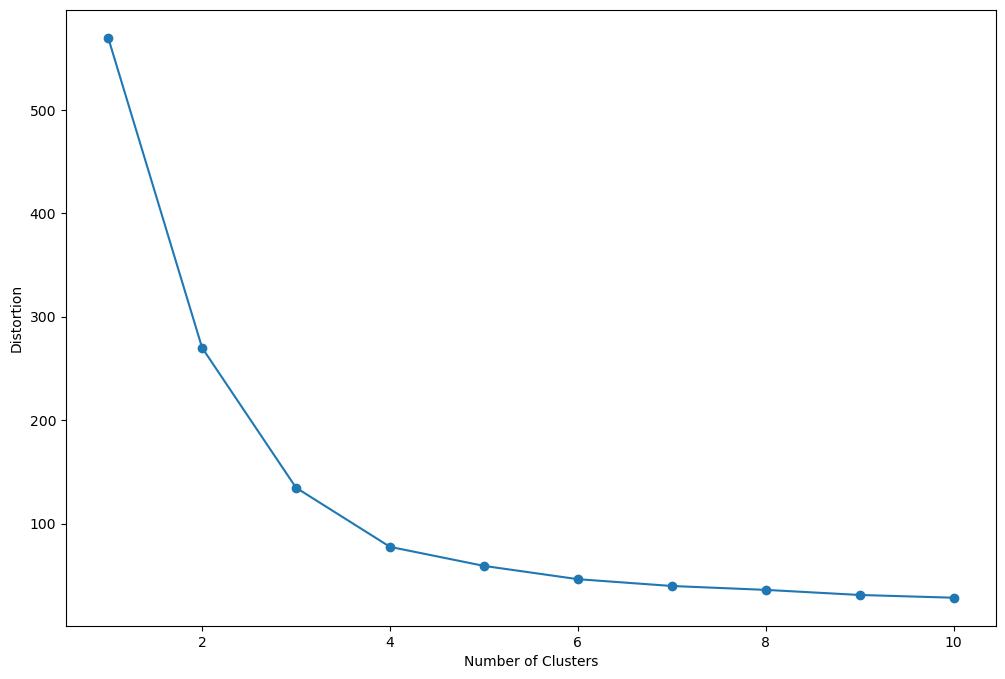

In [64]:
# calculating distortion for kmeans
distortions = []
for i in range (1,11):
    km = KMeans(n_clusters = i,
               n_init=10)
    km.fit(df_norm)
    distortions.append(km.inertia_)
plt.rcParams["figure.figsize"] = (12,8)    
plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.show()

In [23]:
# 3 clusters?

## PCA & Clustering

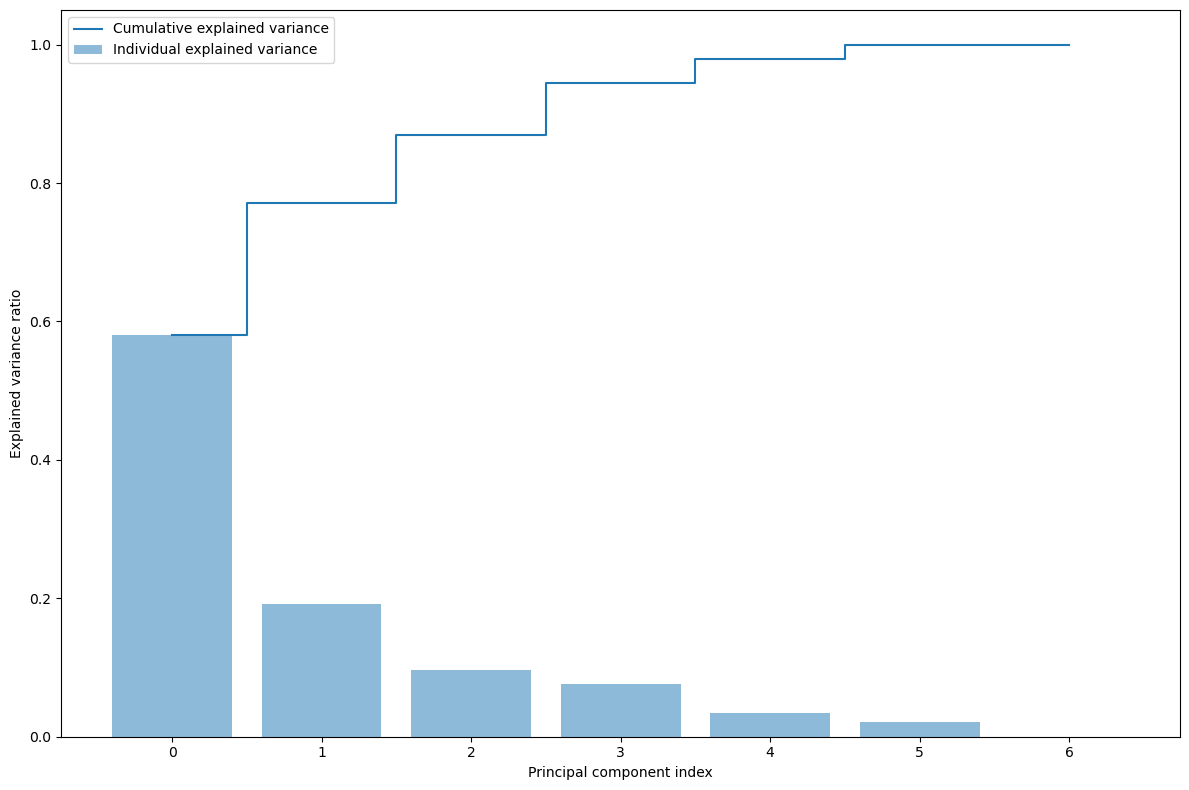

In [65]:
#scree plot
pca = PCA()
#
# Determine transformed features
#
data_pca = pca.fit_transform(df_norm)
#
# Determine explained variance using explained_variance_ration_ attribute
#
exp_var_pca = pca.explained_variance_ratio_
#
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
#
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#
# Create the visualization plot
#
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [17]:
def apply_pca(df, components):
    columns = []
    for i in range(components):
        columns.append(f'column {i + 1}')
    pca = PCA(n_components=components)
    result = pca.fit_transform(df)
    pca_df = pd.DataFrame(data = result, columns=columns)
    return pca_df

In [66]:
pca_scaled = apply_pca(df_norm, 5)

In [67]:
pca_scaled

,column 1,column 2,column 3,column 4,column 5
0,-0.634831,-0.157556,-0.023256,-0.060934,-0.029020
1,-0.665072,-0.190669,-0.034232,0.318263,-0.104147
2,0.785222,-0.162886,-0.017249,0.090198,0.079743
3,0.729543,-0.130807,0.008872,0.263123,0.294862
4,-0.003515,1.052794,-0.419164,0.110128,0.159195
...,...,...,...,...,...
742,0.099083,0.966946,-0.453935,-0.021044,-0.204379
743,-0.661667,-0.147636,-0.019637,0.045187,0.022325
744,-0.689028,-0.087262,0.008769,-0.130755,0.264023
745,-0.577951,-0.219152,-0.039961,-0.041534,-0.235690


In [68]:
km = KMeans(n_clusters=4, init='k-means++')

y_km = km.fit_predict(pca_scaled)

In [24]:
#create plotting function (take it from compass)
def plot_clusters(X,y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []

    for cluster in set(y_res):
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')

    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()

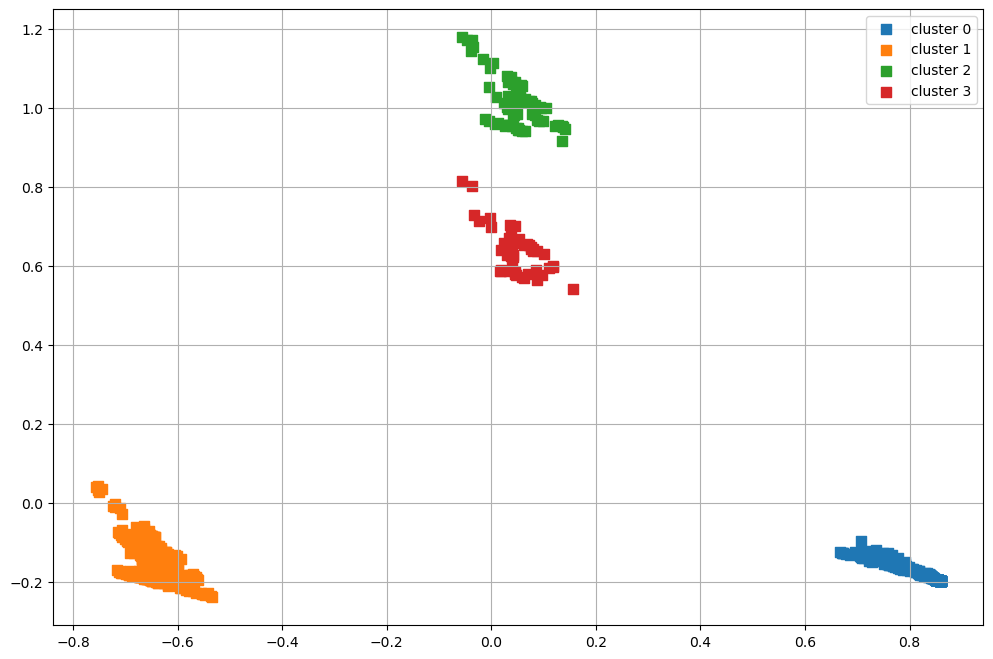

In [69]:
plot_clusters(np.array(pca_scaled), y_km)

In [70]:
demographics_df['cluster'] = y_km

In [71]:
df_c0 = demographics_df[demographics_df['cluster']==0].drop('cluster', axis=1)
df_c1 = demographics_df[demographics_df['cluster']==1].drop('cluster', axis=1)
df_c2 = demographics_df[demographics_df['cluster']==2].drop('cluster', axis=1)
df_c3 = demographics_df[demographics_df['cluster']==3].drop('cluster', axis=1)

In [72]:
df_c0.describe()

,income,age,nbr_children,marital_status_1,marital_status_2,marital_status_3,marital_status_4
count,276.000000,276.000000,276.0,276.0,276.0,276.0,276.0
mean,14167.228261,29.927536,0.0,1.0,0.0,0.0,0.0
std,18417.884618,17.284838,0.0,0.0,0.0,0.0,0.0
min,0.000000,13.000000,0.0,1.0,0.0,0.0,0.0
25%,0.000000,16.000000,0.0,1.0,0.0,0.0,0.0
50%,7622.000000,19.000000,0.0,1.0,0.0,0.0,0.0
75%,21743.000000,42.250000,0.0,1.0,0.0,0.0,0.0
max,111004.000000,84.000000,0.0,1.0,0.0,0.0,0.0


In [73]:
df_c1.describe()

,income,age,nbr_children,marital_status_1,marital_status_2,marital_status_3,marital_status_4
count,353.000000,353.000000,353.000000,353.0,353.0,353.0,353.0
mean,26587.439093,50.796034,1.014164,0.0,1.0,0.0,0.0
std,21137.340173,16.091475,1.136843,0.0,0.0,0.0,0.0
min,1039.000000,21.000000,0.000000,0.0,1.0,0.0,0.0
25%,11375.000000,37.000000,0.000000,0.0,1.0,0.0,0.0
50%,21384.000000,52.000000,1.000000,0.0,1.0,0.0,0.0
75%,36259.000000,61.000000,2.000000,0.0,1.0,0.0,0.0
max,144157.000000,89.000000,5.000000,0.0,1.0,0.0,0.0


In [74]:
df_c2.describe()

,income,age,nbr_children,marital_status_1,marital_status_2,marital_status_3,marital_status_4
count,70.000000,70.000000,70.000000,70.0,70.0,70.0,70.0
mean,26914.528571,47.328571,1.585714,0.0,0.0,0.0,1.0
std,21243.254798,16.346538,1.388283,0.0,0.0,0.0,0.0
min,2772.000000,22.000000,0.000000,0.0,0.0,0.0,1.0
25%,11999.000000,35.000000,0.250000,0.0,0.0,0.0,1.0
50%,19587.000000,42.500000,1.000000,0.0,0.0,0.0,1.0
75%,36611.750000,58.000000,2.000000,0.0,0.0,0.0,1.0
max,90248.000000,88.000000,5.000000,0.0,0.0,0.0,1.0


In [75]:
df_c3.describe()

,income,age,nbr_children,marital_status_1,marital_status_2,marital_status_3,marital_status_4
count,48.0000,48.000000,48.000000,48.0,48.0,48.0,48.0
mean,37468.5000,46.416667,1.354167,0.0,0.0,1.0,0.0
std,32309.6858,14.974920,1.263052,0.0,0.0,0.0,0.0
min,3303.0000,23.000000,0.000000,0.0,0.0,1.0,0.0
25%,16327.0000,33.000000,0.000000,0.0,0.0,1.0,0.0
50%,27910.5000,46.000000,1.000000,0.0,0.0,1.0,0.0
75%,45899.7500,56.000000,2.000000,0.0,0.0,1.0,0.0
max,142274.0000,78.000000,5.000000,0.0,0.0,1.0,0.0


## Radar Charts

In [76]:
df_normal = pd.DataFrame(n_scaler.fit_transform(demographics_df), columns=demographics_df.columns)
df_normal['cluster'] = y_km

In [77]:
df_normal_zero = df_normal[df_normal['cluster']==0].drop('cluster', axis=1)
df_normal_one = df_normal[df_normal['cluster']==1].drop('cluster', axis=1)
df_normal_two = df_normal[df_normal['cluster']==2].drop('cluster', axis=1)
df_normal_three = df_normal[df_normal['cluster']==3].drop('cluster', axis=1)

In [78]:
fig = go.Figure()

fig.add_trace(go.Scatterpolar(r = df_normal_zero.mean(), theta = df_normal_zero.columns,fill='toself'))

fig.update_layout(title = 'Demographics Cluster 0')

fig.show()

In [79]:
fig = go.Figure()

fig.add_trace(go.Scatterpolar(r = df_normal_one.mean(), theta = df_normal_zero.columns, fill='toself'))

fig.update_layout(title = 'Demographics Cluster 1')

fig.show()

In [80]:
fig = go.Figure()

fig.add_trace(go.Scatterpolar(r = df_normal_two.mean(), theta = df_normal_zero.columns, fill='toself'))

fig.update_layout(title = 'Demographics Cluster 2')

fig.show()

In [81]:
fig = go.Figure()

fig.add_trace(go.Scatterpolar(r = df_normal_three.mean(), theta = df_normal_zero.columns, fill='toself'))

fig.update_layout(title = 'Demographics Cluster 3')

fig.show()

In [82]:
fig = go.Figure()

fig.add_trace(go.Scatterpolar(r = df_normal_zero.mean(), theta = df_normal_zero.columns,fill='toself', name = 'Demographics Cluster 0'))
fig.add_trace(go.Scatterpolar(r = df_normal_one.mean(), theta = df_normal_zero.columns, fill='toself', name = 'Demographics Cluster 1'))
fig.add_trace(go.Scatterpolar(r = df_normal_two.mean(), theta = df_normal_zero.columns, fill='toself', name = 'Demographics Cluster 2'))
fig.add_trace(go.Scatterpolar(r = df_normal_three.mean(), theta = df_normal_zero.columns, fill='toself', name = 'Demographics Cluster 3'))

fig.update_layout(title = 'All Demographics Clusters', showlegend=True)

fig.show()

In [35]:
df_normal_zero.describe()

,income,age,nbr_children,marital_status_1,marital_status_2,marital_status_3,marital_status_4
count,70.000000,70.000000,70.000000,70.0,70.0,70.0,70.0
mean,0.186703,0.451692,0.317143,0.0,0.0,0.0,1.0
std,0.147362,0.215086,0.277657,0.0,0.0,0.0,0.0
min,0.019229,0.118421,0.000000,0.0,0.0,0.0,1.0
25%,0.083236,0.289474,0.050000,0.0,0.0,0.0,1.0
50%,0.135873,0.388158,0.200000,0.0,0.0,0.0,1.0
75%,0.253971,0.592105,0.400000,0.0,0.0,0.0,1.0
max,0.626040,0.986842,1.000000,0.0,0.0,0.0,1.0


In [296]:
# exporting this as a csv 
demographics_df.to_csv('customer_demographics_clustered.csv',index=False)

In [294]:
fig = go.Figure()
fig.add_trace(go.Scatter(
        x=x0['pc1'],
        y=x0['pc2'],
        name='cluster 0',
        mode='markers',
        marker=dict(
                color='mediumorchid',
                line=dict(
                color='lavenderblush',
                width=1))
        ))
fig.add_trace(go.Scatter(
        x=x1['pc1'],
        y=x1['pc2'],
        name='cluster 1',
        mode='markers',
        marker=dict(
                color='sandybrown',
                line=dict(
                color='lemonchiffon',
                width=1))
        ))
fig.add_trace(go.Scatter(
        x=x2['pc1'],
        y=x2['pc2'],
        name='cluster 2',
        mode='markers',
        marker=dict(
                color='slateblue',
                line=dict(
                color='lightcyan',
                width=1))
        ))
fig.update_layout(title='Customer Demographics Clusters')
fig.show()